In [17]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
"""По таблице из файла data.csv требуется посчитать количество случаев, когда простой 
транспортного средства между заказами составлял более 8 часов.
"""

In [18]:
with open('data.csv') as f:
    print(f)

<_io.TextIOWrapper name='data.csv' mode='r' encoding='cp1251'>


In [19]:
data = pd.read_csv('data.csv', encoding='cp1251', sep=';')
data

,route_id,order_id,truck_id,client_id,city_loading,city_unloading,datetime_loading_start_plan_order,datetime_loading_end_plan_order,datetime_unloading_start_plan_order,datetime_unloading_end_plan_order,datetime_loading_arrival_fact,datetime_loading_start_fact,datetime_loading_end_fact,datetime_loading_departure_fact,datetime_unloading_arrival_fact,datetime_unloading_start_fact,datetime_unloading_end_fact,datetime_unloading_departure_fact
0,89629,199339,о031ск 750,15,Москва,Москва,31.05.2019 00:18,31.05.2019 03:18,31.05.2019 05:00,31.05.2019 07:00,31.05.2019 00:00,31.05.2019 00:00,31.05.2019 00:43,31.05.2019 00:43,31.05.2019 01:40,31.05.2019 01:40,31.05.2019 14:55,31.05.2019 15:26
1,89629,199804,о031ск 750,15,Москва,Москва,31.05.2019 07:00,31.05.2019 09:00,31.05.2019 10:48,31.05.2019 13:48,31.05.2019 01:40,31.05.2019 01:40,31.05.2019 14:55,31.05.2019 15:26,31.05.2019 16:42,31.05.2019 16:42,31.05.2019 16:42,31.05.2019 16:42
2,89619,198514,с724св 750,15,Москва,Москва,29.05.2019 14:24,29.05.2019 15:38,29.05.2019 19:00,29.05.2019 20:14,29.05.2019 13:14,29.05.2019 13:14,29.05.2019 17:15,29.05.2019 17:15,29.05.2019 20:28,29.05.2019 20:28,29.05.2019 21:58,29.05.2019 21:58
3,89619,198921,с724св 750,15,Москва,Москва,30.05.2019 14:06,30.05.2019 17:06,30.05.2019 20:00,30.05.2019 22:00,29.05.2019 23:49,30.05.2019 11:29,30.05.2019 12:55,30.05.2019 12:55,30.05.2019 15:38,30.05.2019 15:38,31.05.2019 01:02,31.05.2019 01:02
4,89619,199337,с724св 750,15,Москва,Москва,31.05.2019 12:46,31.05.2019 15:46,31.05.2019 17:40,31.05.2019 19:40,31.05.2019 03:58,31.05.2019 03:58,31.05.2019 06:20,31.05.2019 06:20,31.05.2019 15:00,31.05.2019 15:00,31.05.2019 20:50,31.05.2019 20:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,62794,147060,к725мо 750,18,Москва,Санкт-Петербург,04.01.2019 22:00,05.01.2019 00:00,05.01.2019 22:00,06.01.2019 00:00,04.01.2019 18:00,04.01.2019 18:00,04.01.2019 20:00,04.01.2019 20:00,05.01.2019 20:30,05.01.2019 20:30,06.01.2019 10:40,06.01.2019 10:40
6044,62794,147793,к725мо 750,56,Санкт-Петербург,Москва,06.01.2019 12:00,06.01.2019 13:18,07.01.2019 11:00,07.01.2019 13:00,06.01.2019 11:50,06.01.2019 12:00,06.01.2019 18:00,06.01.2019 18:00,07.01.2019 15:00,07.01.2019 15:00,07.01.2019 15:30,07.01.2019 15:45
6045,62794,147937,к725мо 750,56,Владимир,Москва,07.01.2019 22:00,07.01.2019 23:18,08.01.2019 09:00,08.01.2019 11:00,07.01.2019 20:50,07.01.2019 21:40,07.01.2019 22:10,07.01.2019 22:30,08.01.2019 02:40,08.01.2019 09:00,08.01.2019 09:50,08.01.2019 09:55
6046,62789,145982,в637са 750,56,Самара,Москва,31.12.2018 16:00,31.12.2018 17:18,02.01.2019 09:00,02.01.2019 10:18,31.12.2018 09:00,31.12.2018 10:40,31.12.2018 12:30,31.12.2018 12:30,01.01.2019 23:00,02.01.2019 09:00,02.01.2019 11:10,02.01.2019 11:10


In [20]:
data.isna().sum()

route_id                               0
order_id                               0
truck_id                               0
client_id                              0
city_loading                           0
city_unloading                         0
datetime_loading_start_plan_order      0
datetime_loading_end_plan_order        0
datetime_unloading_start_plan_order    0
datetime_unloading_end_plan_order      0
datetime_loading_arrival_fact          0
datetime_loading_start_fact            0
datetime_loading_end_fact              0
datetime_loading_departure_fact        0
datetime_unloading_arrival_fact        0
datetime_unloading_start_fact          0
datetime_unloading_end_fact            0
datetime_unloading_departure_fact      0
dtype: int64

In [21]:
data.nunique()

route_id                                968
order_id                               6048
truck_id                                118
client_id                                44
city_loading                             37
city_unloading                           45
datetime_loading_start_plan_order      3644
datetime_loading_end_plan_order        3998
datetime_unloading_start_plan_order    3361
datetime_unloading_end_plan_order      3461
datetime_loading_arrival_fact          5338
datetime_loading_start_fact            5362
datetime_loading_end_fact              5538
datetime_loading_departure_fact        5542
datetime_unloading_arrival_fact        5357
datetime_unloading_start_fact          5327
datetime_unloading_end_fact            5307
datetime_unloading_departure_fact      5335
dtype: int64

In [22]:
data.dtypes

route_id                                int64
order_id                                int64
truck_id                               object
client_id                               int64
city_loading                           object
city_unloading                         object
datetime_loading_start_plan_order      object
datetime_loading_end_plan_order        object
datetime_unloading_start_plan_order    object
datetime_unloading_end_plan_order      object
datetime_loading_arrival_fact          object
datetime_loading_start_fact            object
datetime_loading_end_fact              object
datetime_loading_departure_fact        object
datetime_unloading_arrival_fact        object
datetime_unloading_start_fact          object
datetime_unloading_end_fact            object
datetime_unloading_departure_fact      object
dtype: object

In [23]:
columns = list(data.columns.values)[6:len(list(data.columns.values))]

for i in tqdm(columns):
    data[i] = pd.to_datetime(data[i], infer_datetime_format=True) # преобразуем даты

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 85.94it/s]


In [24]:
data.dtypes

route_id                                        int64
order_id                                        int64
truck_id                                       object
client_id                                       int64
city_loading                                   object
city_unloading                                 object
datetime_loading_start_plan_order      datetime64[ns]
datetime_loading_end_plan_order        datetime64[ns]
datetime_unloading_start_plan_order    datetime64[ns]
datetime_unloading_end_plan_order      datetime64[ns]
datetime_loading_arrival_fact          datetime64[ns]
datetime_loading_start_fact            datetime64[ns]
datetime_loading_end_fact              datetime64[ns]
datetime_loading_departure_fact        datetime64[ns]
datetime_unloading_arrival_fact        datetime64[ns]
datetime_unloading_start_fact          datetime64[ns]
datetime_unloading_end_fact            datetime64[ns]
datetime_unloading_departure_fact      datetime64[ns]
dtype: object

In [ ]:
"""Что считать простоем и по каким датами в задании не указано. Поэтому, я посчитал период между 
фактическим временем убытия с разгрузки и фактическим прибытием на следующую погрузку.
"""

In [25]:
# сортируем
data = data.sort_values(by=['truck_id', 'datetime_loading_arrival_fact','datetime_unloading_departure_fact'], ascending=True)
# дата следующей погрузки для вычисления простоя
data['datetime_next_loading_arrival_fact']=data['datetime_loading_arrival_fact'].shift(periods=-1) 
# гос. рег. номер автомобиля для определения стыков
data['truck_id_shifted']=data['truck_id'].shift(periods=-1)

In [26]:
# считаем секунды, переводим в часы, округляем
data['dead_time']=((data['datetime_next_loading_arrival_fact'] - 
                    data['datetime_unloading_departure_fact']).dt.total_seconds()/3600).round(decimals=2)

In [27]:
data.isna().sum() # данные по последнему рейсу остаются неполными

route_id                               0
order_id                               0
truck_id                               0
client_id                              0
city_loading                           0
city_unloading                         0
datetime_loading_start_plan_order      0
datetime_loading_end_plan_order        0
datetime_unloading_start_plan_order    0
datetime_unloading_end_plan_order      0
datetime_loading_arrival_fact          0
datetime_loading_start_fact            0
datetime_loading_end_fact              0
datetime_loading_departure_fact        0
datetime_unloading_arrival_fact        0
datetime_unloading_start_fact          0
datetime_unloading_end_fact            0
datetime_unloading_departure_fact      0
datetime_next_loading_arrival_fact     1
truck_id_shifted                       1
dead_time                              1
dtype: int64

In [28]:
# складываем в df все случаи с простоем более 8 часов
# если необходимо считать простои более или равные 8 часам, поменять >8 на >=8
df = data.loc[(data['dead_time']>8) & (data['truck_id_shifted']==data['truck_id'])] 

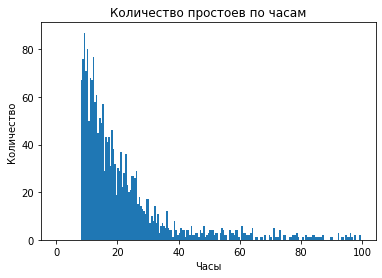

In [33]:
bins = np.arange(0, 100, 0.5)
plt.hist(df['dead_time'], bins=bins, alpha=1)
plt.title('Количество простоев по часам')
plt.xlabel('Часы')
plt.ylabel('Количество')
plt.show()

In [32]:
# % рейсов с простоем
len(df['order_id'])/len(data['order_id'])*100

37.56613756613756

In [31]:
print('Количество случаев, когда простой транспортного средства между заказами составлял более 8 часов:', len(df['dead_time']))

Количество случаев, когда простой транспортного средства между заказами составлял более 8 часов: 2272


In [71]:
df.to_excel("result.xlsx") # выгружаем список случаев с простоем